In [1]:
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torchvision.models import MobileNetV2
from torch import nn
from torch.optim import SGD

from train import *
from loaders import CustomDataLoader

In [3]:
toTensor = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_dataset = datasets.CIFAR10(
    root="./data", train=True, transform=toTensor, download=True
)

test_dataset = datasets.CIFAR10(
    root="./data", train=False, transform=toTensor, download=True
)

BATCH_SIZE = 32
train_loader = CustomDataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = CustomDataLoader(test_dataset, batch_size=BATCH_SIZE)
print(len(train_loader))


Files already downloaded and verified
Files already downloaded and verified
1563


Epoch 0/10


100%|██████████| 40/40 [00:01<00:00, 34.94it/s, loss=1.8179739, acc={tensor(0.8167)}]


Epoch 1/10


100%|██████████| 40/40 [00:01<00:00, 33.42it/s, loss=1.7516187, acc={tensor(0.8561)}]


Epoch 2/10


100%|██████████| 40/40 [00:01<00:00, 35.03it/s, loss=1.6489992, acc={tensor(0.8587)}]


Epoch 3/10


100%|██████████| 40/40 [00:01<00:00, 34.42it/s, loss=1.7070616, acc={tensor(0.8812)}]


Epoch 4/10


100%|██████████| 40/40 [00:01<00:00, 33.26it/s, loss=1.7129318, acc={tensor(0.8665)}]


Epoch 5/10


100%|██████████| 40/40 [00:01<00:00, 35.83it/s, loss=1.6030316, acc={tensor(0.8810)}]


Epoch 6/10


100%|██████████| 40/40 [00:01<00:00, 35.54it/s, loss=1.6780603, acc={tensor(0.8724)}]


Epoch 7/10


100%|██████████| 40/40 [00:01<00:00, 35.11it/s, loss=1.6682099, acc={tensor(0.8747)}]


Epoch 8/10


100%|██████████| 40/40 [00:01<00:00, 33.76it/s, loss=1.6777264, acc={tensor(0.8753)}]


Epoch 9/10


100%|██████████| 40/40 [00:01<00:00, 33.25it/s, loss=1.630522, acc={tensor(0.8870)}] 


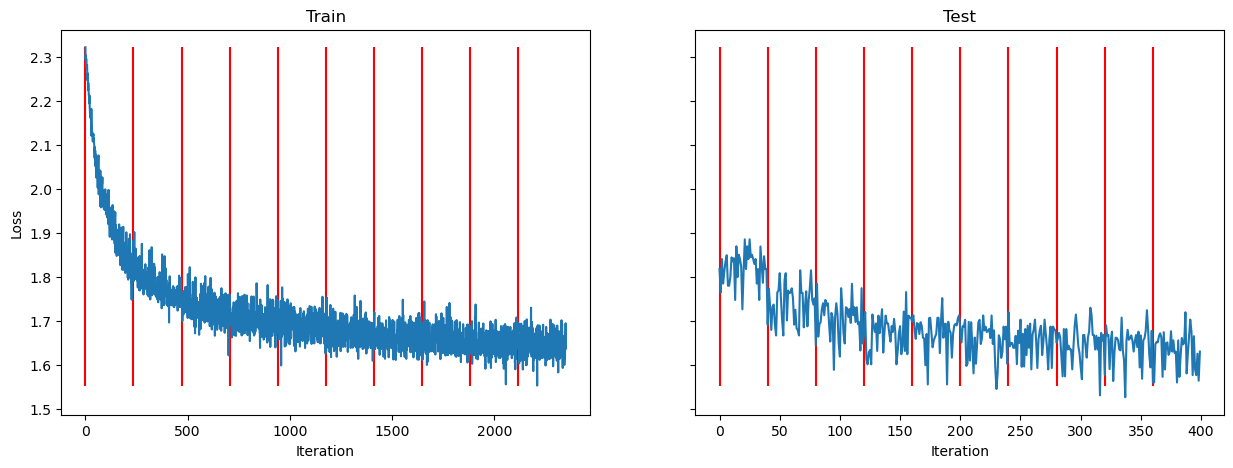

In [3]:
model = MobileNetV2(num_classes=10)
sgd = SGD(model.parameters(), lr=0.01, momentum=0)
# sgd = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
N_EPOCHS = 10

train_loss_data = []
test_loss_data = []
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

for epoch in range(N_EPOCHS):
    print(f"Epoch {epoch}/{N_EPOCHS}")
    train_loss_data += train_model(train_loader, model, loss_fn, sgd)
    c_test_loss_data, acc = test_model(test_loader, model, loss_fn)
    test_loss_data += c_test_loss_data

for epoch in range(N_EPOCHS):
    axs[0].vlines(epoch * len(train_loader), min(train_loss_data), max(train_loss_data), colors='r')
    axs[1].vlines(epoch * len(test_loader), min(train_loss_data), max(train_loss_data), colors='r')

axs[0].set_xlabel("Iteration")
axs[1].set_xlabel("Iteration")
axs[0].set_ylabel("Loss")
axs[0].set_title("Train")
axs[1].set_title("Test")
axs[0].plot(train_loss_data)
axs[1].plot(test_loss_data)